In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest,f_classif

In [2]:
## For result and title printing 
def print_title(title):
    print(f'\n{'-'*60}\n\033[1m{title}\033[0m')
def print_section(title):
    print(f'{'-'*60}\n{title}\n{'-'*60}')

### This data set was chosen for regression analysis is a somewhat simplified and trimmed-down version of the census data 2010 - 2019.

In [4]:
data = pd.read_csv('US_county_census_est_race_eth_2010_2019.csv')

In [5]:

df = pd.DataFrame(data)

In [6]:
df.head(3)

,FIPS,STFIPS,COFIPS,state_abbrev,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1,AL,Alabama,Autauga,2010,54571,43297,9689,484,258,47,796,53261,1310
1,1001,1,1,AL,Alabama,Autauga,2011,55227,43699,9883,514,261,51,819,53888,1339
2,1001,1,1,AL,Alabama,Autauga,2012,54954,43315,9949,552,275,44,819,53639,1315


In [7]:
df.tail(3)

,FIPS,STFIPS,COFIPS,state_abbrev,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
31407,56045,56,45,WY,Wyoming,Weston,2017,6968,6558,44,97,114,2,153,6681,287
31408,56045,56,45,WY,Wyoming,Weston,2018,6924,6474,47,109,125,2,167,6651,273
31409,56045,56,45,WY,Wyoming,Weston,2019,6927,6454,48,117,131,2,175,6642,285


In [8]:
df1 = pd.DataFrame(df)
print_section(f'Since column "state_abbrev" and "state" columns are same, \ndorping "state_abbrev" columns and creating df1 the from datafrme')
df1 = df1.drop("state_abbrev", axis=1)
print_section("DataFrame after dropping the column")
df1.head(3)

------------------------------------------------------------
Since column "state_abbrev" and "state" columns are same, 
dorping "state_abbrev" columns and creating df1 the from datafrme
------------------------------------------------------------
------------------------------------------------------------
DataFrame after dropping the column
------------------------------------------------------------


,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1,Alabama,Autauga,2010,54571,43297,9689,484,258,47,796,53261,1310
1,1001,1,1,Alabama,Autauga,2011,55227,43699,9883,514,261,51,819,53888,1339
2,1001,1,1,Alabama,Autauga,2012,54954,43315,9949,552,275,44,819,53639,1315


In [9]:
print_title("DataFrame Information")
print_section(df1.info())


------------------------------------------------------------
DataFrame Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31410 entries, 0 to 31409
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   FIPS          31410 non-null  int64 
 1   STFIPS        31410 non-null  int64 
 2   COFIPS        31410 non-null  int64 
 3   state         31410 non-null  object
 4   county        31410 non-null  object
 5   year          31410 non-null  int64 
 6   pop           31410 non-null  int64 
 7   white_pop     31410 non-null  int64 
 8   black_pop     31410 non-null  int64 
 9   asian_pop     31410 non-null  int64 
 10  indian_pop    31410 non-null  int64 
 11  pacific_pop   31410 non-null  int64 
 12  two_pop       31410 non-null  int64 
 13  not_hisp_pop  31410 non-null  int64 
 14  hisp_pop      31410 non-null  int64 
dtypes: int64(13), object(2)
memory usage: 3.6+ MB
------------------------------------------

In [10]:
print_title("DataFrame Description")
print_section(df1.describe())


------------------------------------------------------------
DataFrame Description
------------------------------------------------------------
               FIPS        STFIPS        COFIPS          year           pop  \
count  31410.000000  31410.000000  31410.000000  31410.000000  3.141000e+04   
mean   30389.820121     30.286215    103.605540   2014.500000  1.014097e+05   
std    15158.803727     15.140671    107.690218      2.872327  3.251245e+05   
min     1001.000000      1.000000      1.000000   2010.000000  8.200000e+01   
25%    18179.000000     18.000000     35.000000   2012.000000  1.098500e+04   
50%    29177.000000     29.000000     79.000000   2014.500000  2.573350e+04   
75%    45081.000000     45.000000    133.000000   2017.000000  6.741675e+04   
max    56045.000000     56.000000    840.000000   2019.000000  1.010571e+07   

          white_pop     black_pop     asian_pop     indian_pop   pacific_pop  \
count  3.141000e+04  3.141000e+04  3.141000e+04   31410.000000 

In [11]:
print_title("Null values in DataFrame")
print_section(df1.isnull().sum())


------------------------------------------------------------
Null values in DataFrame
------------------------------------------------------------
FIPS            0
STFIPS          0
COFIPS          0
state           0
county          0
year            0
pop             0
white_pop       0
black_pop       0
asian_pop       0
indian_pop      0
pacific_pop     0
two_pop         0
not_hisp_pop    0
hisp_pop        0
dtype: int64
------------------------------------------------------------


In [12]:
print_title("Data Types of Dataframe Varible columns")
print_section(df1.dtypes)


------------------------------------------------------------
Data Types of Dataframe Varible columns
------------------------------------------------------------
FIPS             int64
STFIPS           int64
COFIPS           int64
state           object
county          object
year             int64
pop              int64
white_pop        int64
black_pop        int64
asian_pop        int64
indian_pop       int64
pacific_pop      int64
two_pop          int64
not_hisp_pop     int64
hisp_pop         int64
dtype: object
------------------------------------------------------------


In [13]:
print_title("Duplicated values")
print_section(df1.duplicated().sum())


------------------------------------------------------------
Duplicated values
------------------------------------------------------------
0
------------------------------------------------------------


### Encoding
#### Encoding of object-type columns

In [15]:
df2 = pd.DataFrame(df1)
## finding Object type columns and count the number of unique values
col_object_type=df2.select_dtypes(include=['object']).columns.tolist()
print_title('Object type columns in DataFrame')
print_section(pd.DataFrame({'Colums':col_object_type}))
print_title('Counted unique values in object type columns')
for column_name in col_object_type:
    print_section(f'{column_name}: {len(df1[column_name].unique())}')


------------------------------------------------------------
Object type columns in DataFrame
------------------------------------------------------------
   Colums
0   state
1  county
------------------------------------------------------------

------------------------------------------------------------
Counted unique values in object type columns
------------------------------------------------------------
state: 50
------------------------------------------------------------
------------------------------------------------------------
county: 1876
------------------------------------------------------------


In [16]:
print_title('Aggrigation of Cont and Mean of object type column to target column')
for column_name in col_object_type:
    print_section(df2['pop'].groupby(df2[column_name]).agg(['count','mean']))


------------------------------------------------------------
Aggrigation of Cont and Mean of object type column to target column
------------------------------------------------------------
                count           mean
state                               
Alabama           670   72309.697015
Alaska            290   25246.520690
Arizona           150  453562.080000
Arkansas          750   39643.185333
California        580  665717.851724
Colorado          640   84396.614062
Connecticut        80  447770.737500
Delaware           30  312093.200000
Florida           670  300077.741791
Georgia          1590   63805.340881
Hawaii             50  281353.680000
Idaho             440   37677.020455
Illinois         1020  125699.390196
Indiana           920   71770.554348
Iowa              990   31402.825253
Kansas           1050   27575.745714
Kentucky         1200   36799.828333
Louisiana         640   72344.243750
Maine             160   83252.225000
Maryland          240  247811.12

#### since high cardinality in Features TargetEncoding method used 

In [18]:
print_section(f'Since high cardinality in state and county coluns Target\nEncoding is moste prefered')
encoder=TargetEncoder()

------------------------------------------------------------
Since high cardinality in state and county coluns Target
Encoding is moste prefered
------------------------------------------------------------


In [19]:
df3 = pd.DataFrame(df2)
df3.head(2)

,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1,Alabama,Autauga,2010,54571,43297,9689,484,258,47,796,53261,1310
1,1001,1,1,Alabama,Autauga,2011,55227,43699,9883,514,261,51,819,53888,1339


In [20]:
print_section(f'Since high cardinality in state and county coluns Target\nEncoding is moste prefered')
encoder.fit(df2['state'],df2['pop'])
df3['state'] = encoder.transform(df2['state'],df2['pop'])
encoder.fit(df2['county'],df2['pop'])
df3['county'] = encoder.transform(df2['county'],df2['pop'])
df3.head(3)

------------------------------------------------------------
Since high cardinality in state and county coluns Target
Encoding is moste prefered
------------------------------------------------------------


,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1,72309.697015,88962.379901,2010,54571,43297,9689,484,258,47,796,53261,1310
1,1001,1,1,72309.697015,88962.379901,2011,55227,43699,9883,514,261,51,819,53888,1339
2,1001,1,1,72309.697015,88962.379901,2012,54954,43315,9949,552,275,44,819,53639,1315


### Outlayer removeal

In [22]:
# creating custom definition to remove outliers using IQR method
def outliers(data):
    for col in data.select_dtypes(include=['int64','float64']).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5*IQR)
        upper = Q3 + (1.5*IQR)

        # Capping
        data[col] = data[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return data

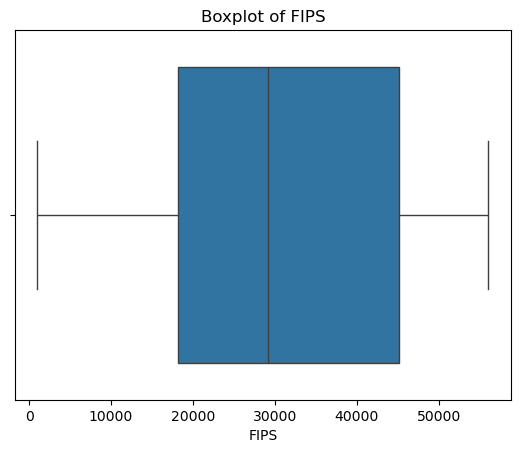

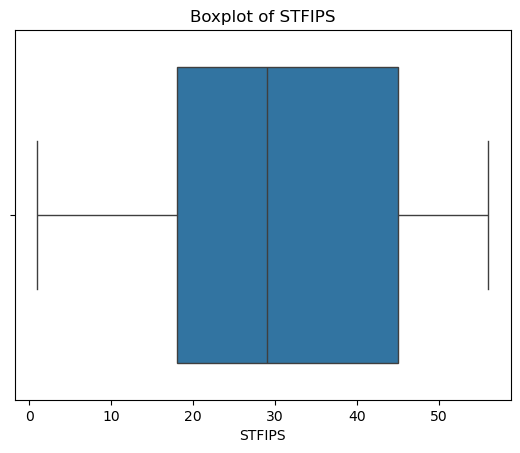

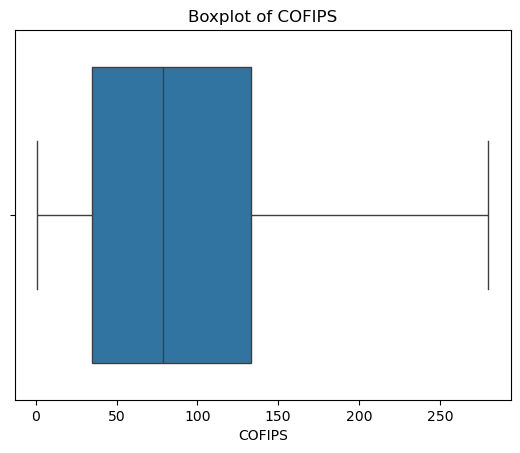

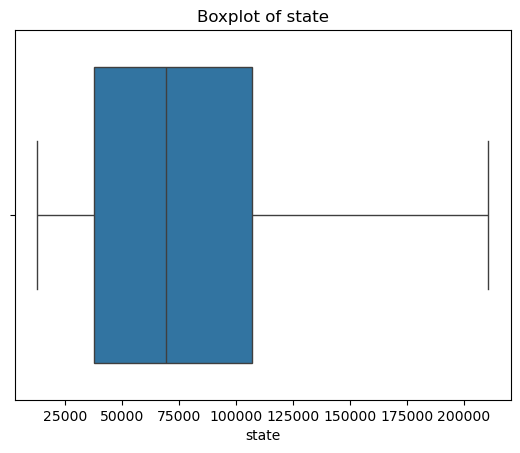

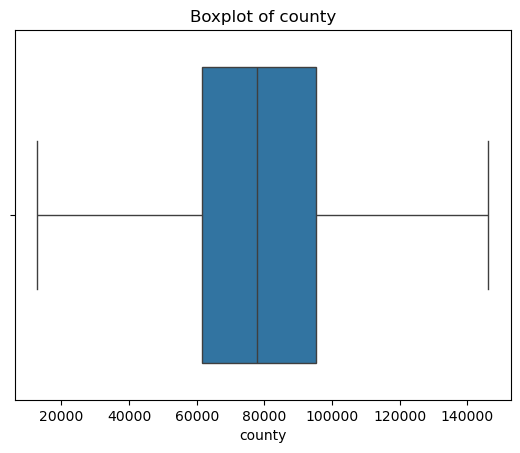

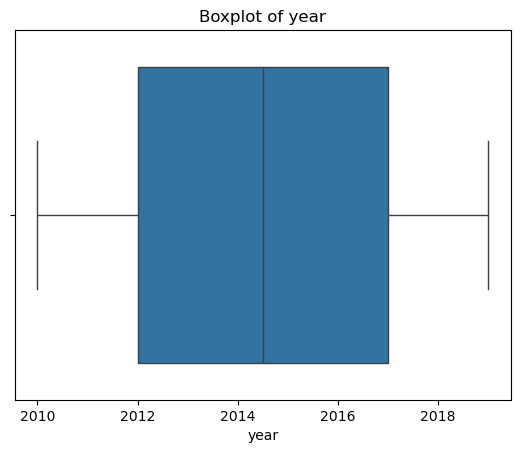

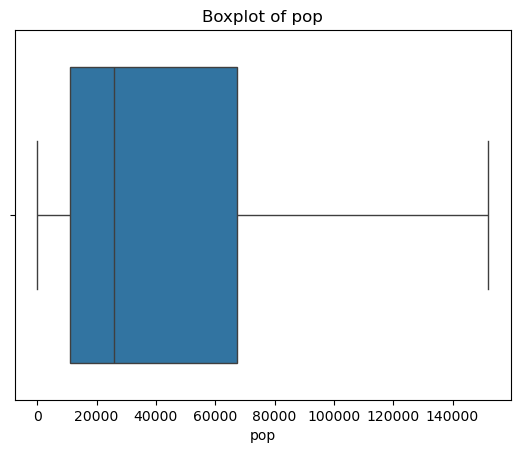

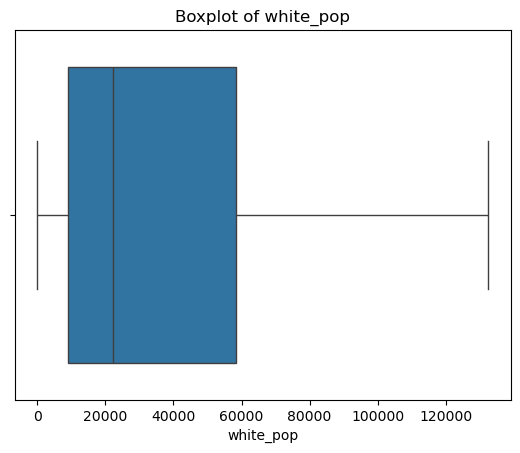

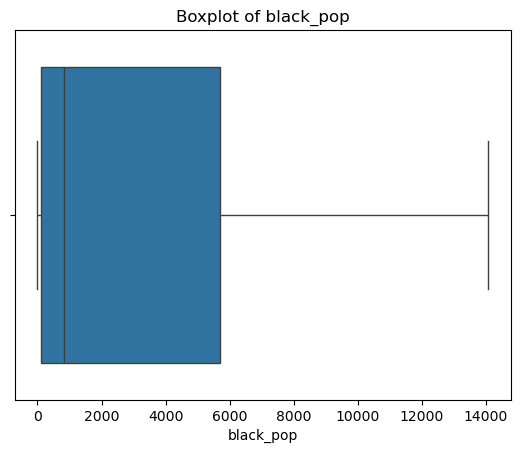

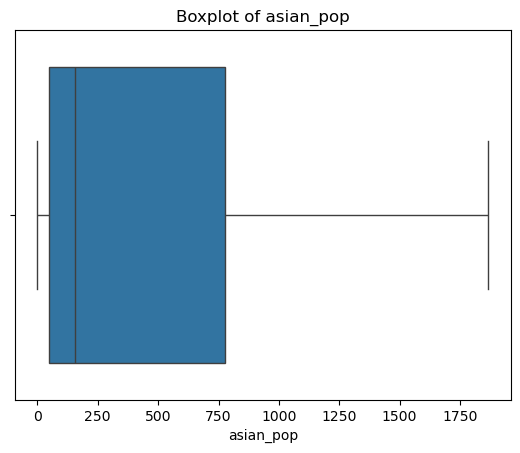

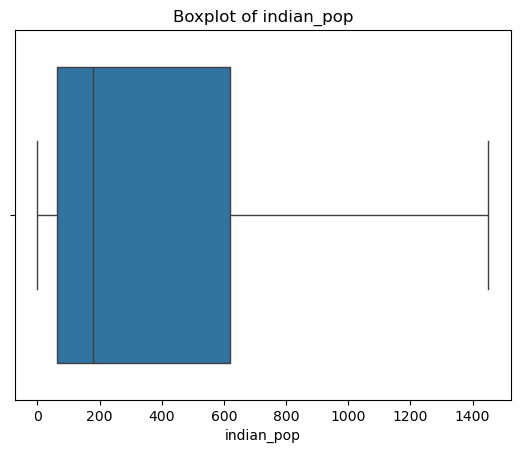

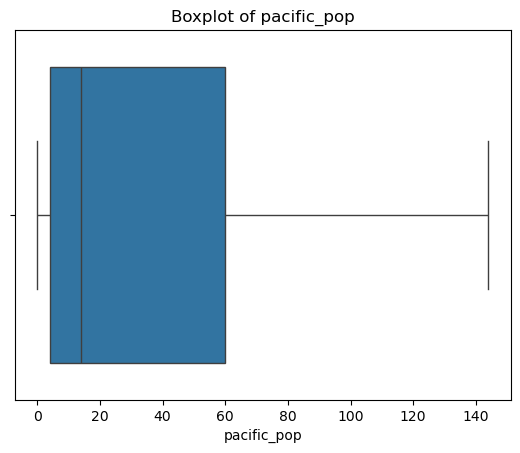

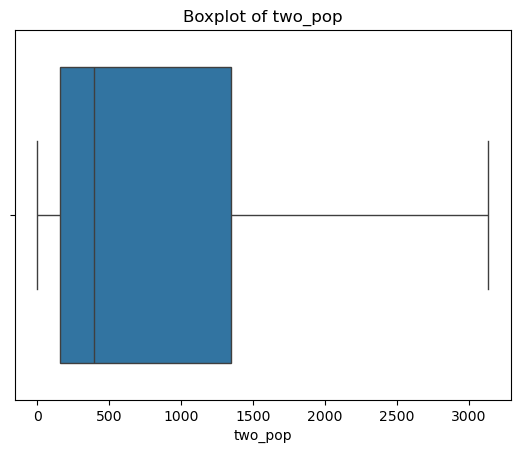

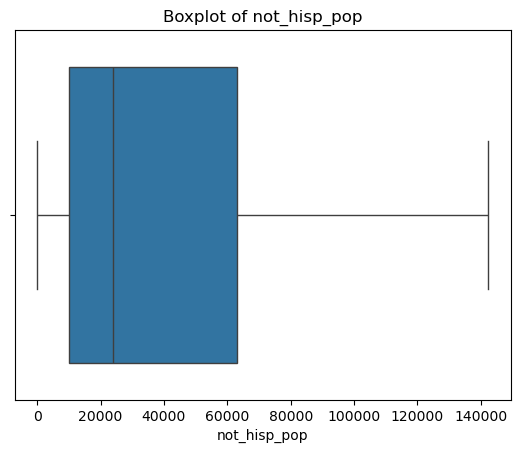

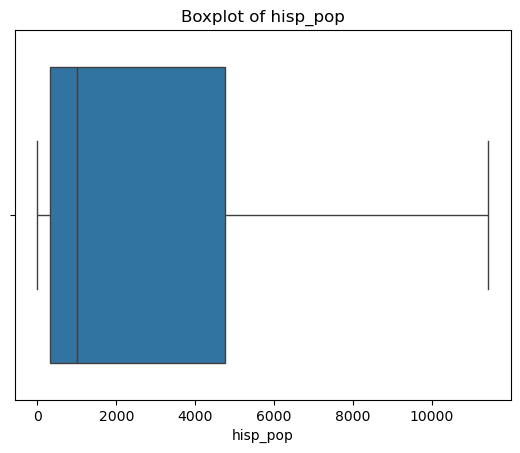

In [23]:
df4 = pd.DataFrame(df3)
outliers(df4)
### syntex to visualise the df to detect outliers for each columns 
for col in df4.columns:
    sns.boxplot(data=df4,x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [24]:
df4

,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,1001,1,1.0,72309.697015,88962.379901,2010,54571.0,43297.0,9689.0,484.0,258.0,47.0,796.0,53261.0,1310.0
1,1001,1,1.0,72309.697015,88962.379901,2011,55227.0,43699.0,9883.0,514.0,261.0,51.0,819.0,53888.0,1339.0
2,1001,1,1.0,72309.697015,88962.379901,2012,54954.0,43315.0,9949.0,552.0,275.0,44.0,819.0,53639.0,1315.0
3,1001,1,1.0,72309.697015,88962.379901,2013,54727.0,42943.0,9984.0,561.0,279.0,46.0,914.0,53363.0,1364.0
4,1001,1,1.0,72309.697015,88962.379901,2014,54893.0,42945.0,10103.0,573.0,279.0,50.0,943.0,53461.0,1432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31405,56045,56,45.0,25117.400058,76044.504868,2015,7208.0,6835.0,39.0,81.0,107.0,2.0,144.0,6923.0,285.0
31406,56045,56,45.0,25117.400058,76044.504868,2016,7220.0,6826.0,38.0,88.0,108.0,2.0,158.0,6924.0,296.0
31407,56045,56,45.0,25117.400058,76044.504868,2017,6968.0,6558.0,44.0,97.0,114.0,2.0,153.0,6681.0,287.0
31408,56045,56,45.0,25117.400058,76044.504868,2018,6924.0,6474.0,47.0,109.0,125.0,2.0,167.0,6651.0,273.0


### Data Normalization
#### PowerTransformer

In [46]:
df5 = pd.DataFrame(df4)

In [50]:
pt = PowerTransformer(method='yeo-johnson',standardize=True)
numeriacal_features = df5.select_dtypes(include=['int64','float64']).columns
df5[numeriacal_features] = pt.fit_transform(df5[numeriacal_features])

### Feature Scaling
##### Min Max scaling 

In [53]:
scaling=MinMaxScaler()
numerical_col = df5.select_dtypes(include=['number'])
df5 = scaling.fit_transform(numerical_col)
df5=pd.DataFrame(df5, columns=numerical_col.columns, index=df1.index) #datafrme after min max scaling

In [55]:
df5

,FIPS,STFIPS,COFIPS,state,county,year,pop,white_pop,black_pop,asian_pop,indian_pop,pacific_pop,two_pop,not_hisp_pop,hisp_pop
0,0.0,0.0,0.000000,0.554671,0.659997,0.000000,0.798261,0.792089,0.943342,0.785909,0.711263,0.762913,0.774597,0.801536,0.713485
1,0.0,0.0,0.000000,0.554671,0.659997,0.111168,0.800458,0.793676,0.946307,0.795070,0.713070,0.779779,0.778997,0.803734,0.716189
2,0.0,0.0,0.000000,0.554671,0.659997,0.222322,0.799547,0.792160,0.947304,0.805981,0.721256,0.749347,0.778997,0.802863,0.713955
3,0.0,0.0,0.000000,0.554671,0.659997,0.333462,0.798786,0.790681,0.947830,0.808462,0.723524,0.758484,0.796056,0.801895,0.718477
4,0.0,0.0,0.000000,0.554671,0.659997,0.444588,0.799342,0.790689,0.949606,0.811712,0.723524,0.775683,0.800943,0.802239,0.724506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31405,1.0,1.0,0.418833,0.193597,0.572519,0.555699,0.472255,0.513141,0.291646,0.529153,0.578547,0.206333,0.530654,0.470564,0.534143
31406,1.0,1.0,0.418833,0.193597,0.572519,0.666795,0.472489,0.512967,0.289307,0.540388,0.579900,0.206333,0.542909,0.470584,0.538384
31407,1.0,1.0,0.418833,0.193597,0.572519,0.777878,0.467515,0.507684,0.302596,0.553672,0.587786,0.206333,0.538649,0.465626,0.534925
31408,1.0,1.0,0.418833,0.193597,0.572519,0.888946,0.466631,0.505990,0.308645,0.569704,0.601303,0.206333,0.550278,0.465003,0.529338


In [58]:
skewness = df5.skew()
print_section("\033[1mSkewness of Features in dataframe after Scaling\033[0m")
print_section(skewness)

------------------------------------------------------------
Skewness of Features in dataframe after Scaling
------------------------------------------------------------
------------------------------------------------------------
FIPS           -0.239634
STFIPS         -0.217165
COFIPS         -0.093298
state          -0.027890
county         -0.023344
year           -0.000431
pop            -0.037186
white_pop      -0.040779
black_pop      -0.076912
asian_pop      -0.030226
indian_pop     -0.030700
pacific_pop    -0.019348
two_pop        -0.029473
not_hisp_pop   -0.041507
hisp_pop       -0.031629
dtype: float64
------------------------------------------------------------


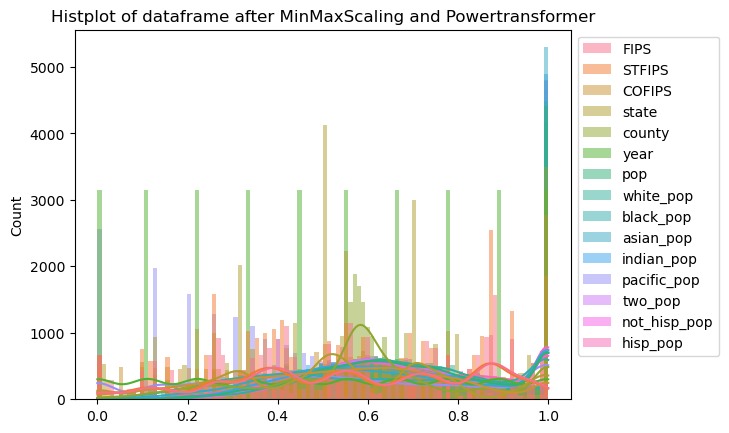

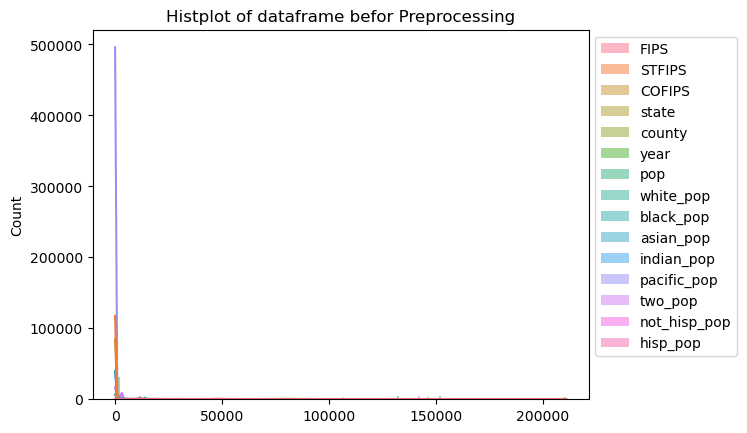

In [60]:
ax=sns.histplot(df5,kde=True,linewidth=0,legend=True)
plt.title('Histplot of dataframe after MinMaxScaling and Powertransformer')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

ax=sns.histplot(df4,kde=True,linewidth=0,legend=True)
plt.title('Histplot of dataframe befor Preprocessing')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

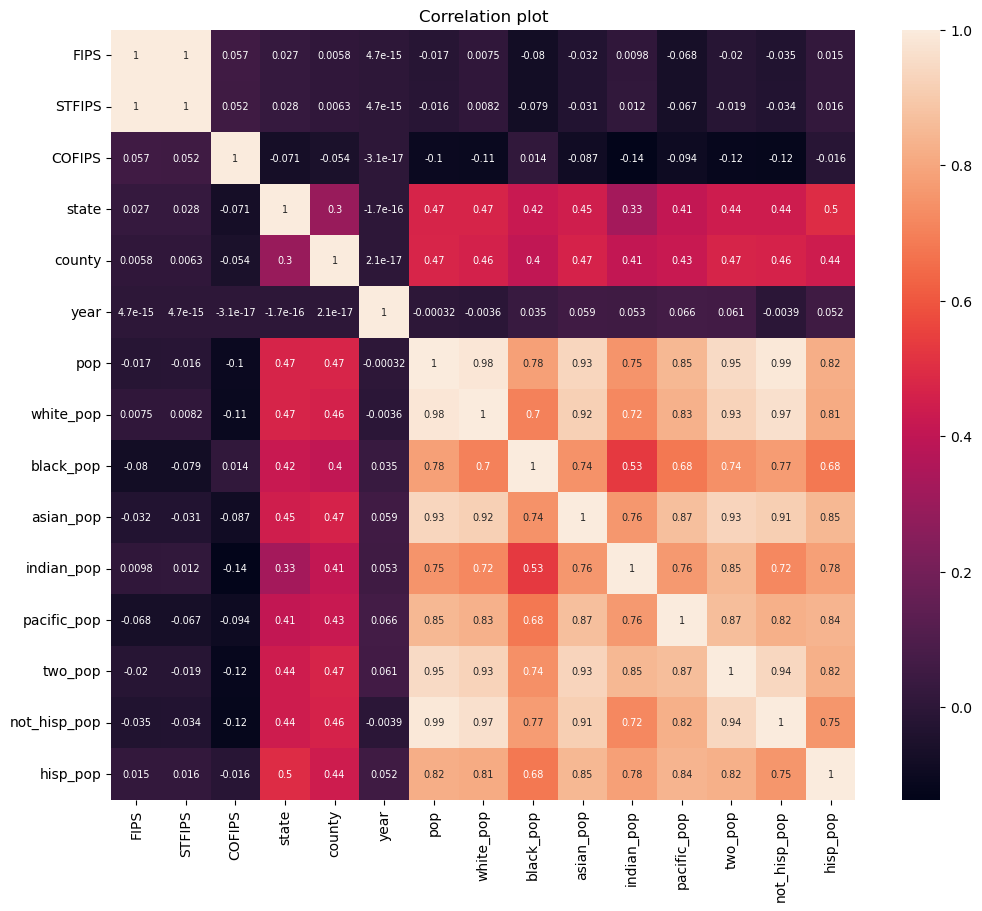

In [64]:
#correlation of data frame after EDA
cor_df = df5.corr()
#correlation plot
plt.figure(figsize=(12,10))
sns.heatmap(cor_df,annot=True,annot_kws={'size': 7})
plt.title('Correlation plot')
plt.show()

### Feature Selection

In [81]:
#converting df5 to new dataset name for futher process
df_pop = pd.DataFrame(df5)

In [83]:
x = df_pop.drop('pop', axis=1)
y = df_pop['pop']

In [133]:
sk = SelectKBest(score_func=f_classif,k=14)
x_new = sk.fit_transform(x,y)

In [134]:
#Get selected feture names and scores
selected_features = x.columns[sk.get_support()]
features_scores = pd.DataFrame({'feature':x.columns,'Score':sk.scores_}).sort_values(by='Score',ascending=False)

print_title('Selected Features:')
print_section(pd.DataFrame(list(selected_features)))
print_title("\nFeature Scores:")
print_section(features_scores)


------------------------------------------------------------
Selected Features:
------------------------------------------------------------
               0
0           FIPS
1         STFIPS
2         COFIPS
3          state
4         county
5           year
6      white_pop
7      black_pop
8      asian_pop
9     indian_pop
10   pacific_pop
11       two_pop
12  not_hisp_pop
13      hisp_pop
------------------------------------------------------------

------------------------------------------------------------

Feature Scores:
------------------------------------------------------------
         feature      Score
12  not_hisp_pop  58.900630
6      white_pop  53.820492
11       two_pop  21.896501
8      asian_pop  16.318713
10   pacific_pop   7.173527
13      hisp_pop   5.689379
7      black_pop   4.632560
9     indian_pop   3.769807
4         county   1.960009
3          state   1.432425
2         COFIPS   1.052234
5           year   1.029346
1         STFIPS   1.007908
0         

In [76]:
# Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)